<a href="https://colab.research.google.com/github/IG-Reagan/Product-Weight-Optimisation-to-Reduce-Giveaway_Causal-Inference-Analysis/blob/main/part_2_sc_weight_error_analysis_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Soft Cheese Weight Optimisation Project

### Part 2a. Cheese Weight Error Prediction

#### Finding the Important Predictors for Variations in Cheese Weight

This analysis uses selected features from the experiments conducted to predict the causes of variations in cheese weight. The purpose of applying Machine Learning (ML) is to challenge the associations observed from descriptive and statistical analyses (in part 1) by using more sophisticated ML algorithms to benchmark the findings. The target variable (cheese_weight_error) is derived by obtaining the difference between each cheese weight and the collective mean weight per vat. e.g., each cheese weights from vat 2 minus mean weight from vat 2. The important features are arranged in descending order of importance in bar charts (tallest bar = more important), and various ML algorithms are applied to determine the best model fit. The important features from the two best fit models are discussed. Next steps in the analysis include:

5. Feature Engineering
6. Feature Selection
7. Data Spliting into Train / Test
8. Execute a base model to determine the baseline
9. Try out different other models
10. Perform hyperparameter tuning if needed

#### Step 5: Feature Engineering and Selection

In [ ]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
# Import the data and view the first few rows.

data = pd.read_csv(r'softcheese_dataset.csv', index_col=0)
data.head(5)

,vat_no,afe_height,tray_no,cheese_weight,tray_position,stack_no,vat_position,inner_or_outer_inner,inner_or_outer_outer,tray_class_bottom,...,stack_position_inbetween,no_of_scrapes_2,no_of_scrapes_4,no_of_scrapes_6,no_of_scrapes_random,exp_num_exp_1,exp_num_exp_2,exp_num_exp_3,cheese_weight_mean,cheese_weight_error
0,2,113,1,190,1,1,10,0,1,0,...,0,0,0,0,1,1,0,0,185.979048,4.020952
1,2,113,1,185,1,1,10,0,1,0,...,0,0,0,0,1,1,0,0,185.979048,-0.979048
2,2,113,1,184,1,1,10,0,1,0,...,0,0,0,0,1,1,0,0,185.979048,-1.979048
3,2,113,1,181,1,1,10,0,1,0,...,0,0,0,0,1,1,0,0,185.979048,-4.979048
4,2,113,1,190,1,1,10,0,1,0,...,0,0,0,0,1,1,0,0,185.979048,4.020952


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1540 entries, 0 to 1539
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vat_no                    1540 non-null   int64  
 1   afe_height                1540 non-null   int64  
 2   tray_no                   1540 non-null   int64  
 3   cheese_weight             1540 non-null   int64  
 4   tray_position             1540 non-null   int64  
 5   stack_no                  1540 non-null   int64  
 6   vat_position              1540 non-null   int64  
 7   inner_or_outer_inner      1540 non-null   int64  
 8   inner_or_outer_outer      1540 non-null   int64  
 9   tray_class_bottom         1540 non-null   int64  
 10  tray_class_mid            1540 non-null   int64  
 11  tray_class_top            1540 non-null   int64  
 12  stack_position_front      1540 non-null   int64  
 13  stack_position_inbetween  1540 non-null   int64  
 14  no_of_scrapes

##### Tray Numbers

In [ ]:
# Tray number represents the sequence in which the cheese trays are produced from the AFE machine, therefore this should be ordinal.

from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the tray numbers and transform them
data['encoded_tray_no'] = encoder.fit_transform(data['tray_no'].values.reshape(-1, 1)).astype(int)+1

# Print the encoded tray numbers
data.encoded_tray_no.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
data.encoded_tray_no.info()

<class 'pandas.core.series.Series'>
Index: 1540 entries, 0 to 1539
Series name: encoded_tray_no
Non-Null Count  Dtype
--------------  -----
1540 non-null   int32
dtypes: int32(1)
memory usage: 18.0 KB


##### Tray Positions

In [ ]:
data.tray_position.unique()

array([ 1,  5,  6,  9, 10,  2], dtype=int64)

##### Stack Number
Stack number simply is an identifier for the columns. It has no ordinal or characteristic differentiation per se, since there's already a variable representing whether a column is in front or inbetween other column. Specifically for exp 3, the column or stack number represents each number of scrapes (2, 4 or 6) as used in that column, and we already have that information captured in another column as well. Therefore this variable shall be removed.

##### Vat Position

Vat position should be a categorical variable as it identifies what vat was used in each of the experiements;

In [ ]:
# Convert vat_position to nominal variable

# Use get_dummies() to convert 'vat_position' column to nominal variables
nominal_vars = pd.get_dummies(data['vat_position'], prefix='vat_position')

# Concatenate the nominal variables with the original DataFrame
data = pd.concat([data, nominal_vars], axis=1)

data.head()

,vat_no,afe_height,tray_no,cheese_weight,tray_position,stack_no,vat_position,inner_or_outer_inner,inner_or_outer_outer,tray_class_bottom,...,no_of_scrapes_random,exp_num_exp_1,exp_num_exp_2,exp_num_exp_3,cheese_weight_mean,cheese_weight_error,encoded_tray_no,vat_position_2,vat_position_10,vat_position_13
0,2,113,1,190,1,1,10,0,1,0,...,1,1,0,0,185.979048,4.020952,1,False,True,False
1,2,113,1,185,1,1,10,0,1,0,...,1,1,0,0,185.979048,-0.979048,1,False,True,False
2,2,113,1,184,1,1,10,0,1,0,...,1,1,0,0,185.979048,-1.979048,1,False,True,False
3,2,113,1,181,1,1,10,0,1,0,...,1,1,0,0,185.979048,-4.979048,1,False,True,False
4,2,113,1,190,1,1,10,0,1,0,...,1,1,0,0,185.979048,4.020952,1,False,True,False


In [ ]:
data.tray_position.info()

<class 'pandas.core.series.Series'>
Index: 1540 entries, 0 to 1539
Series name: tray_position
Non-Null Count  Dtype
--------------  -----
1540 non-null   int64
dtypes: int64(1)
memory usage: 24.1 KB


#### Step 6: Feature Selection

In [ ]:
data.columns

Index(['vat_no', 'afe_height', 'tray_no', 'cheese_weight', 'tray_position',
       'stack_no', 'vat_position', 'inner_or_outer_inner',
       'inner_or_outer_outer', 'tray_class_bottom', 'tray_class_mid',
       'tray_class_top', 'stack_position_front', 'stack_position_inbetween',
       'no_of_scrapes_2', 'no_of_scrapes_4', 'no_of_scrapes_6',
       'no_of_scrapes_random', 'exp_num_exp_1', 'exp_num_exp_2',
       'exp_num_exp_3', 'cheese_weight_mean', 'cheese_weight_error',
       'encoded_tray_no', 'vat_position_2', 'vat_position_10',
       'vat_position_13'],
      dtype='object')

In [ ]:
cols_to_drop = ['vat_no', 'tray_no', 'stack_no', 'vat_position', 'cheese_weight_mean']
data = data.drop(cols_to_drop, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1540 entries, 0 to 1539
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   afe_height                1540 non-null   int64  
 1   cheese_weight             1540 non-null   int64  
 2   tray_position             1540 non-null   int64  
 3   inner_or_outer_inner      1540 non-null   int64  
 4   inner_or_outer_outer      1540 non-null   int64  
 5   tray_class_bottom         1540 non-null   int64  
 6   tray_class_mid            1540 non-null   int64  
 7   tray_class_top            1540 non-null   int64  
 8   stack_position_front      1540 non-null   int64  
 9   stack_position_inbetween  1540 non-null   int64  
 10  no_of_scrapes_2           1540 non-null   int64  
 11  no_of_scrapes_4           1540 non-null   int64  
 12  no_of_scrapes_6           1540 non-null   int64  
 13  no_of_scrapes_random      1540 non-null   int64  
 14  exp_num_exp_1

These features have been dropped for reasons explained below:

'vat_no': Vat position is used instead as it correctly identifies the ID of each vat that was used for the experiments.

'tray_no': This variable is replaced with encoded_tray_no which has been codified into an ordinal variable to keep all the necessary properties that better informs the model.

'stack_no': This variable is not relevant and may confuse the model because it determines stack_position (front / inbetween) for exp 1 & 2 but aligns with no_of_scrapes for exp 3.

'vat_position': Dummies have been created for this variable therefore no need to leave the original.

'cheese_weight_mean': This is same for all cheeses from same vat, and correlates with cheese weight. We do not want to introduce any factor of the cheese weight in the model.

#### Step 7: Train / Test Data Split

In [ ]:
# drop the variable cheese_weight
data1=data.copy()
data1 = data.drop('cheese_weight', axis = 1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1540 entries, 0 to 1539
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   afe_height                1540 non-null   int64  
 1   tray_position             1540 non-null   int64  
 2   inner_or_outer_inner      1540 non-null   int64  
 3   inner_or_outer_outer      1540 non-null   int64  
 4   tray_class_bottom         1540 non-null   int64  
 5   tray_class_mid            1540 non-null   int64  
 6   tray_class_top            1540 non-null   int64  
 7   stack_position_front      1540 non-null   int64  
 8   stack_position_inbetween  1540 non-null   int64  
 9   no_of_scrapes_2           1540 non-null   int64  
 10  no_of_scrapes_4           1540 non-null   int64  
 11  no_of_scrapes_6           1540 non-null   int64  
 12  no_of_scrapes_random      1540 non-null   int64  
 13  exp_num_exp_1             1540 non-null   int64  
 14  exp_num_exp_2

##### 1. Split data into training and testing

In [ ]:
# Split data into training and testing data

from sklearn.model_selection import train_test_split

# Define the independent variables (features)
X = data1.drop('cheese_weight_error', axis=1)

# Define the target variable (dependent variable)
y = data1['cheese_weight_error']

# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['afe_height'])

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (1232, 20) (1232,)
Test set shape: (308, 20) (308,)


<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:20: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:13: SyntaxWarning: invalid escape sequence '\P'
<>:20: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\2936426710.py:6: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_26_barchart_train_test_1.jpeg', dpi=350)
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\2936426710.py:13: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_27_barchart_train_2.jpeg', dpi=350)
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\2936426710.py:20: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(

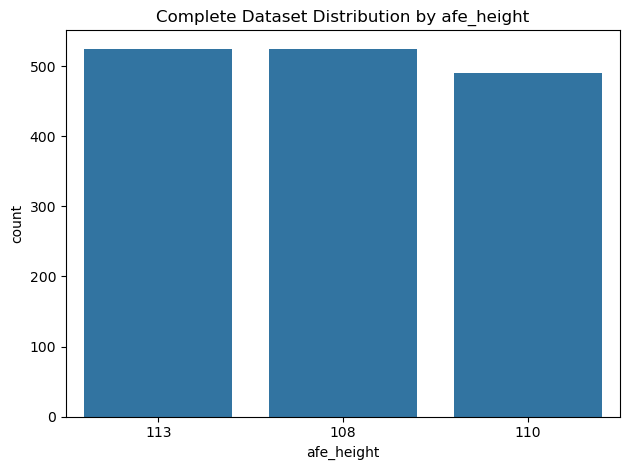

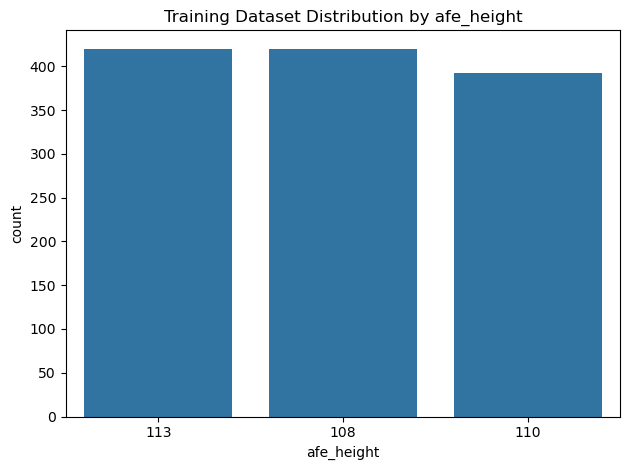

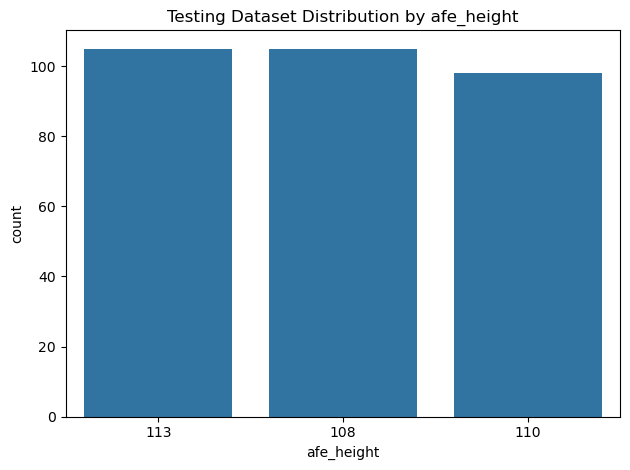

In [ ]:
# Check that the train and test data follow the same distribution as the full dataset

ax = sns.countplot(x='afe_height', data=X, order=X['afe_height'].value_counts().index)
plt.title('Complete Dataset Distribution by afe_height')
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_26_barchart_train_test_1.jpeg', dpi=350)

plt.show()

ax = sns.countplot(x='afe_height', data=X_train, order=X['afe_height'].value_counts().index)
plt.title('Training Dataset Distribution by afe_height')
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_27_barchart_train_2.jpeg', dpi=350)

plt.show()

ax = sns.countplot(x='afe_height', data=X_test, order=X['afe_height'].value_counts().index)
plt.title('Testing Dataset Distribution by afe_height')
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_28_barchart_train_3.jpeg', dpi=350)

plt.show()

The data is divided by AFE height since each experiment have a unique AFE setting. This is to examine that the sample data (Test and Train) similarly distributed as the full dataset. Above bar charts show that both training and testing data have the same distribution with the full dataset. Notice that the 110 height for exp 3 has a slightly shorter bare chart compared to the other two. That is because the last tray for exp 3 was removed as it actually came from another vat which might confuse the model.

#### Step 8: Setting up a baseline model

We use a Linear Regression model as baseline. The model assumes a linear relationship between the independent varibles to predict the target variable. It is one of the simplest algorithms which makes it a great baseline.

Baseline Model RMSE: 7.029947485005098
Baseline Model R-squared: 0.4968214022857802


C:\Users\giwa.iziomo\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


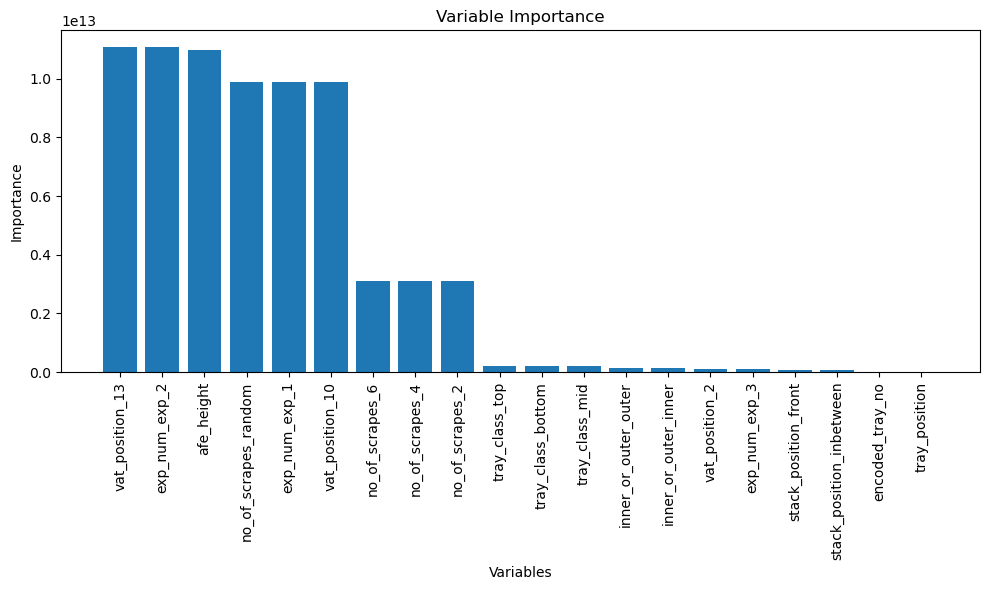

In [ ]:
# Use a linear regression model as baseline

#Import the linear regression packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a new instance of the linear regression model
baseline_model = LinearRegression()

# Fit the model to the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = baseline_model.predict(X_test)

# Calculate the root mean squared error (RMSE) as the evaluation metric
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print("Baseline Model RMSE:", rmse)
print("Baseline Model R-squared:", r2)

# Get the coefficients (importance) of each variable
importance = np.abs(baseline_model.coef_)

# Sort the importance values in descending order
sorted_idx = np.argsort(importance)[::-1]

# Get the names of the variables
feature_names = X_train.columns

# Plot the variable importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance[sorted_idx], align='center')
plt.xticks(range(len(importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.tight_layout()
plt.show()

Compare the RMSE value with the descriptive statistics (standard deviation and maximum error) of cheese_weight_error to determine whether the model is actually predicting beyond the standard distribution of the variable.

In [ ]:
data1['cheese_weight_error'].describe()

count    1.540000e+03
mean     7.086972e-15
std      9.692699e+00
min     -3.497905e+01
25%     -7.015238e+00
50%     -1.285714e-01
75%      6.876190e+00
max      3.102095e+01
Name: cheese_weight_error, dtype: float64

In [ ]:
# Get the intercept (b0)
intercept = baseline_model.intercept_

# Get the coefficients (b1, b2, b3, ..., bn)
coefficients = baseline_model.coef_

# Print the coefficients
print("Intercept:", intercept)
for i, coef in enumerate(coefficients):
    print(f"Coefficient {i+1}: {coef}")

print('\n','The mathematical expression is: cheese_weight_error = b0 + b1 * afe_height + b2 * tray_position + b3 * inner_or_outer_inner + ... + bn * vat_position_13')

Intercept: -1211712389440386.8
Coefficient 1: 10981664096803.223
Coefficient 2: 0.723719853831145
Coefficient 3: 141658905652.8415
Coefficient 4: 141658905660.6905
Coefficient 5: 210215696897.7637
Coefficient 6: 210215696895.52213
Coefficient 7: 210215696903.92297
Coefficient 8: 63896685616.50819
Coefficient 9: 63896685615.57189
Coefficient 10: 3095715354820.047
Coefficient 11: 3095715354825.54
Coefficient 12: 3095715354829.13
Coefficient 13: -9877141595520.37
Coefficient 14: -9877141595520.367
Coefficient 15: 11090590171317.584
Coefficient 16: 108926074513.2725
Coefficient 17: 0.9580557302316668
Coefficient 18: 108926074513.2725
Coefficient 19: -9877141595520.367
Coefficient 20: 11090590171317.584

 The mathematical expression is: cheese_weight_error = b0 + b1 * afe_height + b2 * tray_position + b3 * inner_or_outer_inner + ... + bn * vat_position_13


The RMSE of 7.039 is smaller than the standard deviation (Std) of cheese_weight_error 9.693, suggesting that the baseline model's predictions exhibit a narrower range of errors compared to the inherent variability present in the cheese_weight_error values. The RMSE is also smaller than the maximum value (Max) of cheese_weight_error 31.021. This indicates that the baseline model's predictions generally have lower magnitudes of error than the largest errors observed in the dataset.

The RMSE serves as a comprehensive measure of the model's prediction accuracy, accounting for both the magnitude and direction of errors. Taking into account this specific context, the baseline model's predictions deviate from the true cheese_weight_error values by approximately 7.039 units. This deviation is relatively samller than the standard deviation and maximum values of the cheese_weight_error. The R-Squared value of 0.495 indicates a prediciton power of almost 50%. This means that the independent features are only able to explain 50% of the variations in the target variable using a linear relationship, therefore indicating that more variables needs to be introduced into the model.

Since the relationship between the target and independent variables may not be linear in nature, other more complex algorithms are applied to see if the prediction power can be improved.

#### Step 9: Other more complex models

##### a. Random Forest Regressor: Tree based algorithm

<>:45: SyntaxWarning: invalid escape sequence '\P'
<>:73: SyntaxWarning: invalid escape sequence '\P'
<>:45: SyntaxWarning: invalid escape sequence '\P'
<>:73: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\3113469029.py:45: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_29_barchart_RFR_feature_importance.jpeg', dpi=350)
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\3113469029.py:73: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_30_piechart_RFR_feature_importance.jpeg', dpi=350)
C:\Users\giwa.iziomo\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

Random Forest RMSE: 6.117399503638081
Random Forest R-squared: 0.6189765667561584


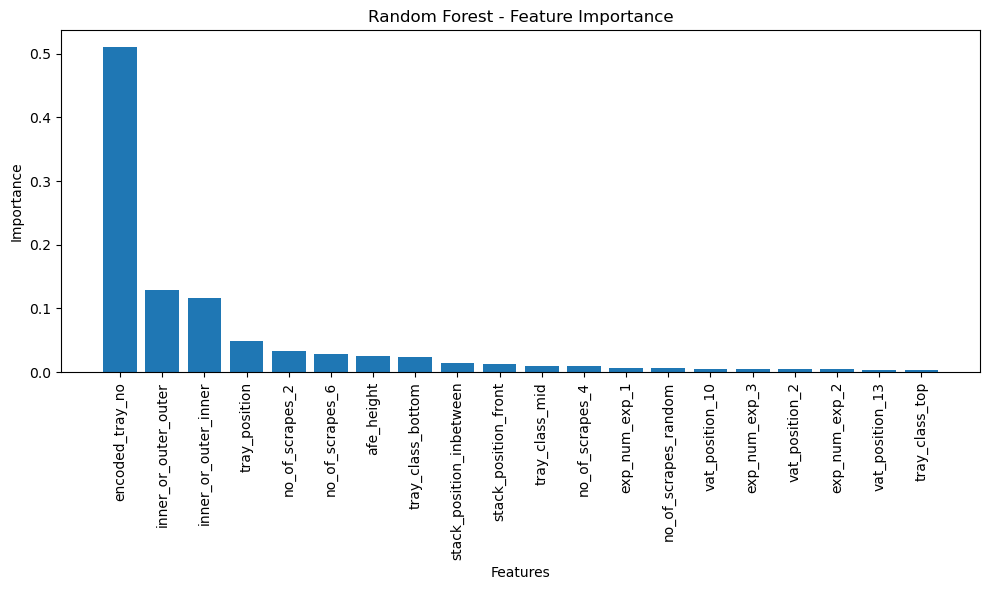

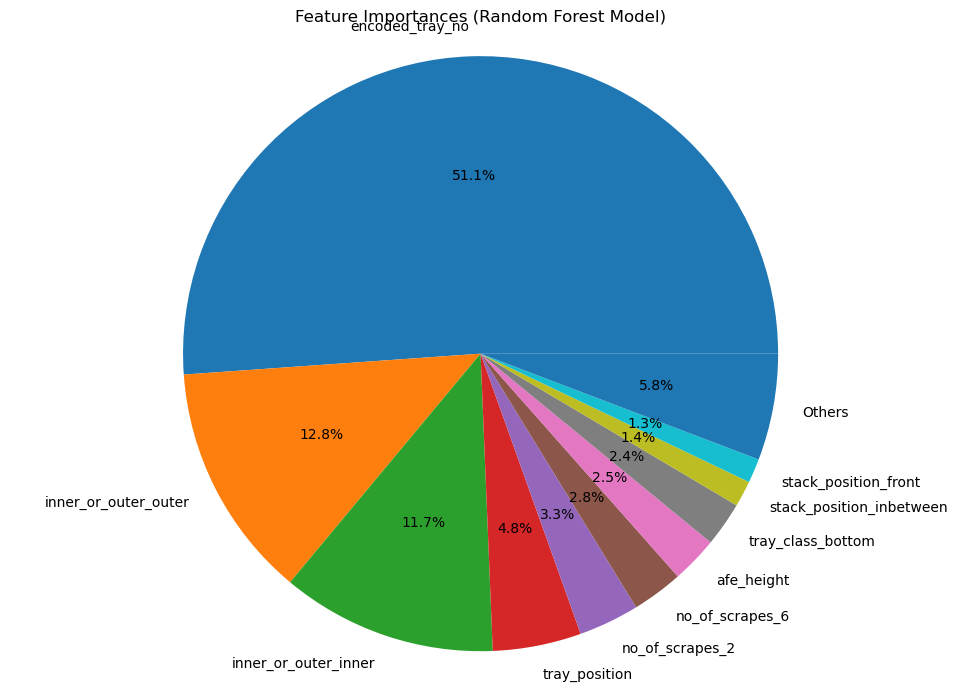

In [ ]:
# Import the Radom forest regressor packages

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest regressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Random Forest RMSE:", rmse)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importance = importances[indices]
sorted_feature_names = features[indices]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("Random Forest R-squared:", r2)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest - Feature Importance")
plt.tight_layout()

plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_29_barchart_RFR_feature_importance.jpeg', dpi=350)

plt.show()

# Calculate percentage importance
total_importance = np.sum(sorted_importance)
percentage_importance = sorted_importance / total_importance * 100

top_10_importance = percentage_importance[:10]
top_10_feature_names = sorted_feature_names[:10]

# Calculate percentage importance for other features
other_importance = 100 - np.sum(top_10_importance)

# Create labels for the pie chart
labels = list(top_10_feature_names)
labels.append('Others')

# Create a list of percentage importance values
values = list(top_10_importance)
values.append(other_importance)

# Create a pie chart of feature importances
plt.figure(figsize=(10, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Feature Importances (Random Forest Model)')
plt.axis('equal')
plt.tight_layout()
# plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_30_piechart_RFR_feature_importance.jpeg', dpi=350)

plt.show()

The R-squared value of 0.619 suggests that approximately 62% of the variation in the cheese_weight_error can be explained by the independent variables in the Random Forest model. This indicates a moderate level of predictive power. However, a significant portion of the variation remains unexplained (38%). The RMSE value says that, on average, the predictions made by the Random Forest model deviates from the true cheese_weight_error by approximately 6.12g. Compared to the standard deviation of the cheese_weight_error 9.693, the RMSE suggests that the model's predictions have a relatively moderate level of error.

Also, the model attributes over 50% of variations in weight to the tray number (sequence of production from the AFE machine), followed by inner / outer, tray position on the vertical stack and no of scrapes. Other models would be tested to validate the assumption of this Random Forest Regressor!

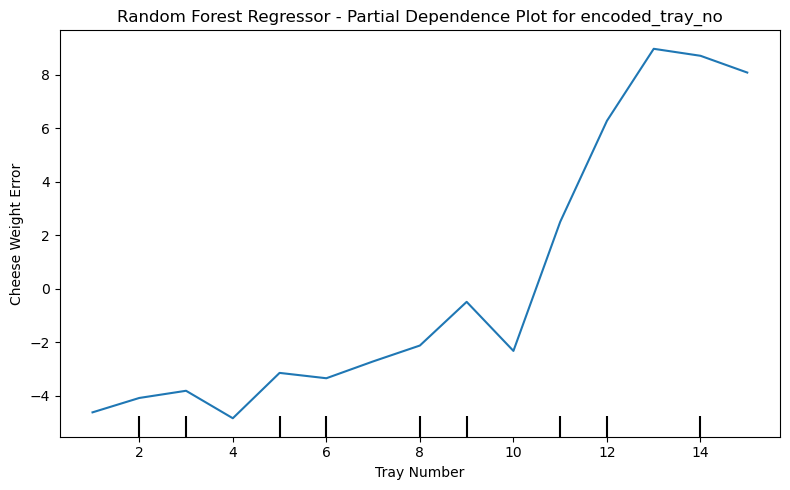

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['encoded_tray_no'], grid_resolution=50, ax=ax)

plt.xlabel('Tray Number')
plt.ylabel('Cheese Weight Error')
plt.title('Random Forest Regressor - Partial Dependence Plot for encoded_tray_no')
plt.tight_layout()
plt.show()

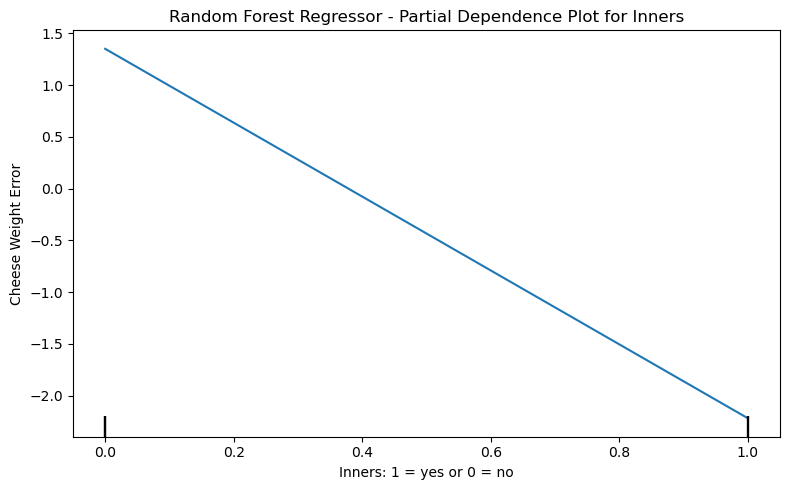

In [ ]:
# Partial Dependence Plots (PDP) for the random forest regressor - inners
# Plot the PDP for the 'encoded_tray_no' feature
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['inner_or_outer_inner'], grid_resolution=50, ax=ax)
plt.xlabel('Inners: 1 = yes or 0 = no')
plt.ylabel('Cheese Weight Error')
plt.title('Random Forest Regressor - Partial Dependence Plot for Inners')
plt.tight_layout()
# plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_36_PDP_RFR_inners.jpeg', dpi=350)
plt.show()

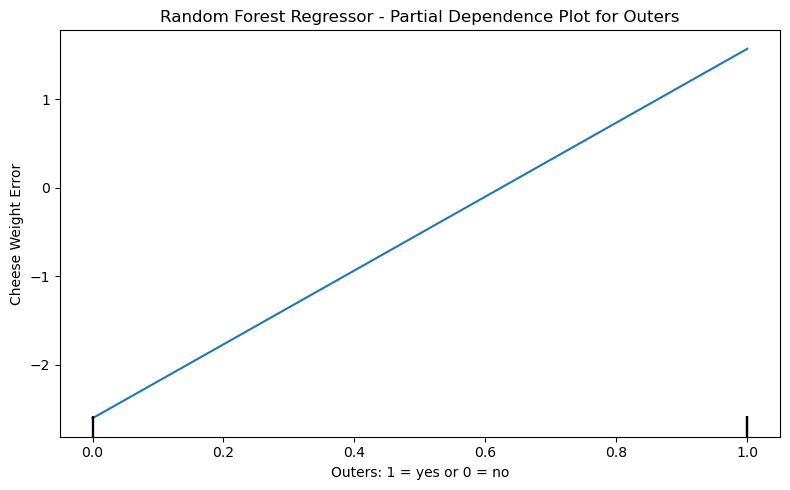

In [ ]:
# Partial Dependence Plots (PDP) for the random forest regressor - outers
# Plot the PDP for the 'encoded_tray_no' feature
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['inner_or_outer_outer'], grid_resolution=50, ax=ax)
plt.xlabel('Outers: 1 = yes or 0 = no')
plt.ylabel('Cheese Weight Error')
plt.title('Random Forest Regressor - Partial Dependence Plot for Outers')
plt.tight_layout()
# plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_37_PDP_RFR_outers.jpeg', dpi=350)
plt.show()

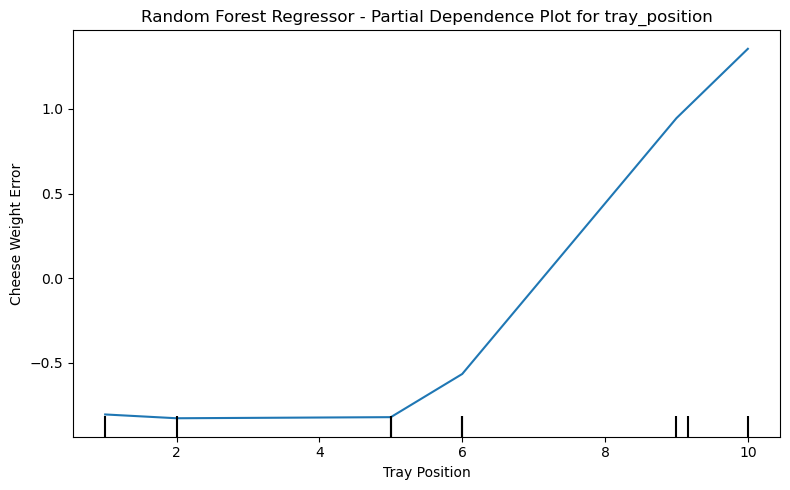

In [ ]:
# Partial Dependence Plots (PDP) for the random forest regressor - tray_position
# Plot the PDP for the 'encoded_tray_no' feature
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['tray_position'], grid_resolution=50, ax=ax)
plt.xlabel('Tray Position')
plt.ylabel('Cheese Weight Error')
plt.title('Random Forest Regressor - Partial Dependence Plot for tray_position')
plt.tight_layout()
# plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_38_PDP_RFR_tray_position.jpeg', dpi=350)
plt.show()

##### b. XGBoost

In [ ]:
# Uncomment below to install XGBoost ALgorithm if not already on your computer

!pip install --upgrade xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/150.0 MB 7.8 MB/s eta 0:00:20
   ---------------------------------------- 1.0/150.0 MB 10.6 MB/s eta 0:00:15
   ---------------------------------------- 1.7/150.0 MB 11.8 MB/s eta 0:00:13
    --------------------------------------- 2.8/150.0 MB 14.9 MB/s eta 0:00:10
   - -------------------------------------- 4.2/150.0 MB 16.7 MB/s eta 0:00:09
   - -------------------------------------- 5.8/150.0 MB 19.6 MB/s eta 0:00:08
   - -------------------------------------- 7.2/150.0 MB 21.9 MB/s eta 0:00:07
   -- ------------------------------------- 8.7/150.0 MB 23.2 MB/s eta 0:00:07
   -- ------------------------------------- 10.2/150.0 MB 23.2 MB/s eta 0:00:07
   --- ------------------------------------ 11.6/150.0 MB 28.4 MB/s eta 0:00:05
   --- ------------------------------------ 12.4/150.0 MB 28.5 MB/s

RMSE: 6.1134


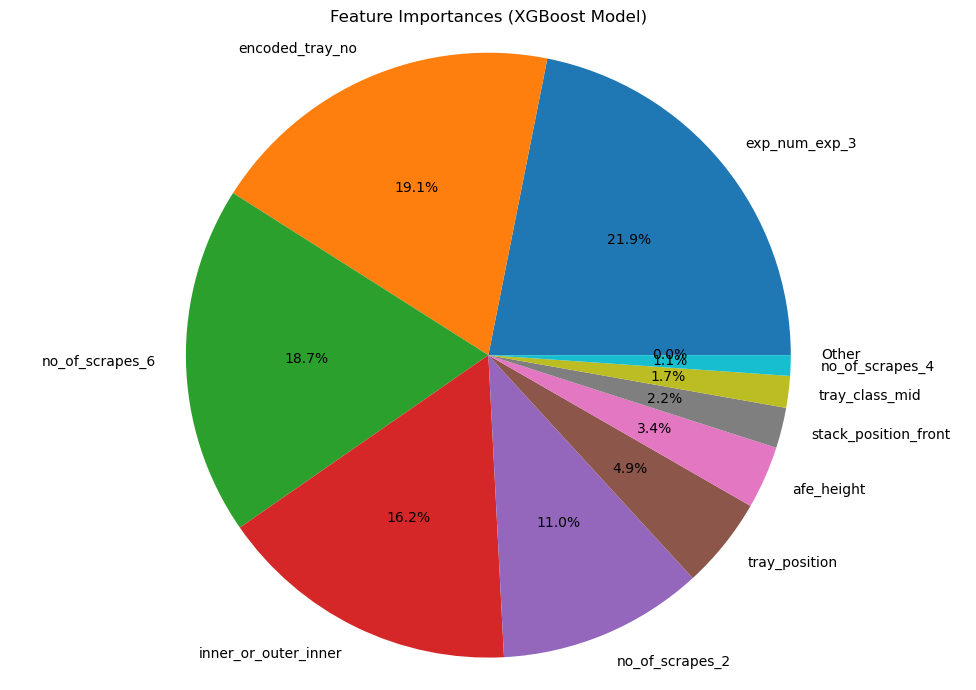

In [ ]:
# Import xgboost algorithm packages

import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the XGBoost model
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print("RMSE: {:.4f}".format(rmse))

# Get feature importances
importance = model.feature_importances_
feature_names = X_train.columns

# Sort feature importances
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Normalise feature importances
importance_normalised = importance_sorted / np.sum(importance_sorted)

# Calculate percentage importance
percentage_importance = importance_normalised * 100

top_10_importance = percentage_importance[:10]
top_10_feature_names = feature_names_sorted[:10]

# Calculate percentage importance for other features
other_importance = 100 - np.sum(top_10_importance)
other_importance = max(other_importance, 0)  # ensure non-negative

# Create labels for the pie chart
labels = list(top_10_feature_names)
labels.append('Other')

# Create a list of percentage importance values
values = list(top_10_importance)
values.append(other_importance)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Feature Importances (XGBoost Model)')
plt.axis('equal')
plt.tight_layout()
plt.show()

The RMSE and R-Squared for the XGBoost model is quite similar to those obtained from the Random Forest Regressor (RFR). However, the distribution of variable importance suggests that tray_no only contributes 22% of the variations in cheese weights. The other top contributing factors are also similar to the the RFR model, ie., inner / outer, no of scrapes, tray_position, etc. In order to fully comprehend the level of contribution of the tray_no to variations in cheese weight, a specific experiment needs to be conducted isolating other features to determine the pure effect of tray sequence from the AFE production.

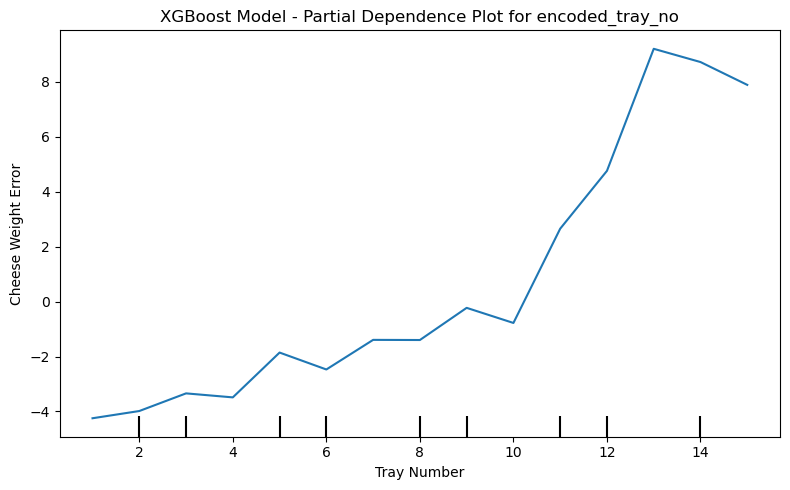

In [ ]:
# Partial Dependence Plots (PDP) for xgboost - encoded_tray_no
# Plot the PDP for the 'encoded_tray_no' feature
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['encoded_tray_no'], grid_resolution=50, ax=ax)
plt.xlabel('Tray Number')
plt.ylabel('Cheese Weight Error')
plt.title('XGBoost Model - Partial Dependence Plot for encoded_tray_no')
plt.tight_layout()
# plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_40_PDP_XGB_tray_no.jpeg', dpi=350)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\705140407.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_41_PDP_XGB_inners.jpeg', dpi=350)


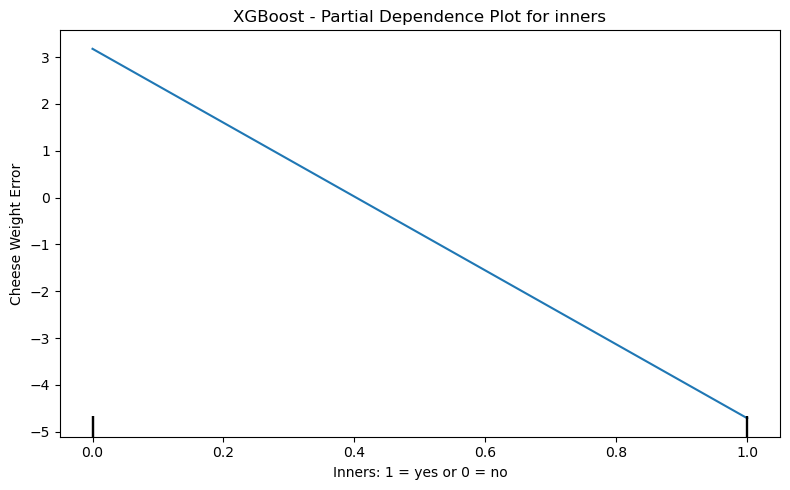

In [ ]:
# Partial Dependence Plots (PDP) for xgboost - inner
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['inner_or_outer_inner'], grid_resolution=50, ax=ax)
plt.xlabel('Inners: 1 = yes or 0 = no')
plt.ylabel('Cheese Weight Error')
plt.title('XGBoost - Partial Dependence Plot for inners')
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_41_PDP_XGB_inners.jpeg', dpi=350)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\1187016502.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_42_PDP_XGB_outer.jpeg', dpi=350)
C:\Users\giwa.iziomo\AppData\Local\anaconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


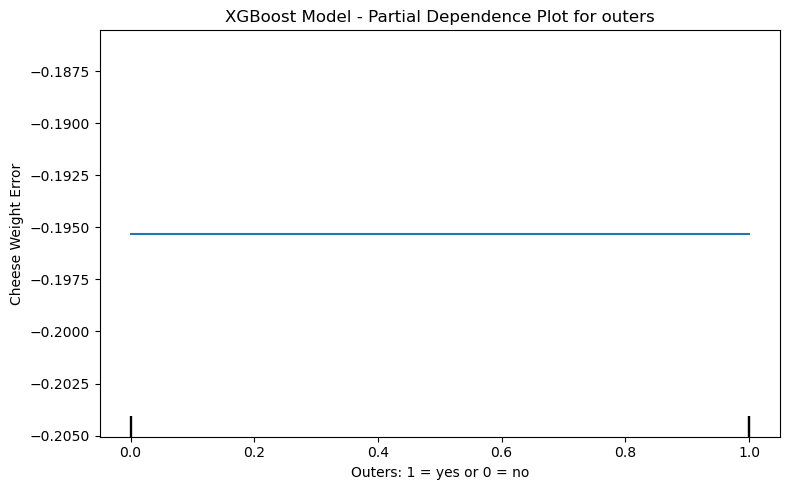

In [ ]:
# Partial Dependence Plots (PDP) for xgboost - outer
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['inner_or_outer_outer'], grid_resolution=50, ax=ax)
plt.xlabel('Outers: 1 = yes or 0 = no')
plt.ylabel('Cheese Weight Error')
plt.title('XGBoost Model - Partial Dependence Plot for outers')
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_42_PDP_XGB_outer.jpeg', dpi=350)
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\giwa.iziomo\AppData\Local\Temp\ipykernel_31308\1143956783.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_44_PDP_XGB_tray_position.jpeg', dpi=350)


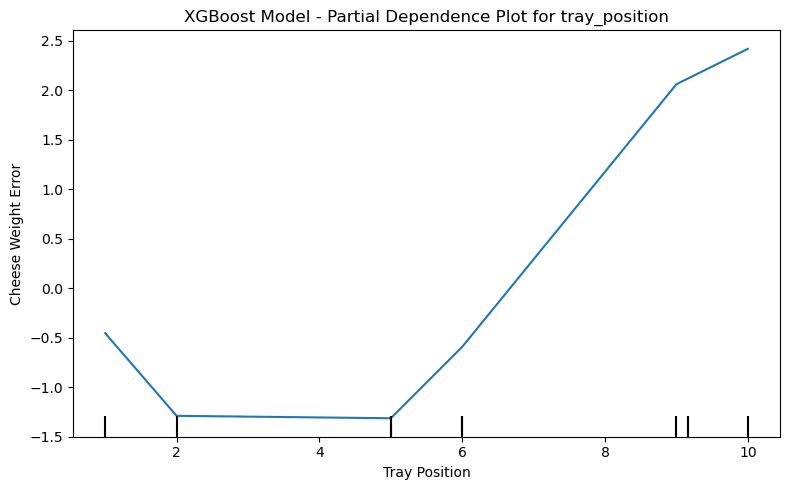

In [ ]:
# Partial Dependence Plots (PDP) for xgboost - tray position
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, features=['tray_position'], grid_resolution=50, ax=ax)
plt.xlabel('Tray Position')
plt.ylabel('Cheese Weight Error')
plt.title('XGBoost Model - Partial Dependence Plot for tray_position')
plt.tight_layout()
plt.savefig(f'C:\\Users\\giwa.iziomo\\Documents\\KTP_DS\Project\\Presentions\\Soft Cheese Weight Optimisation Report\\image_44_PDP_XGB_tray_position.jpeg', dpi=350)
plt.show()

##### c. Support Vector Machines (SVM)

RMSE: 7.1036
R-squared: 0.4862


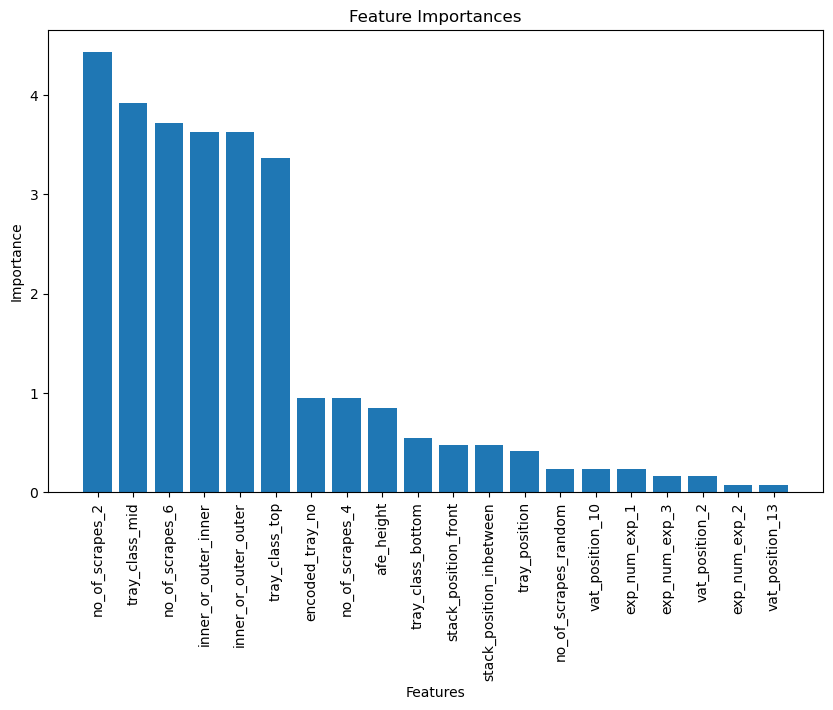

In [ ]:
# Import packages

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define the SVM model
model = SVR(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print("RMSE: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r_squared))

# Get feature importances
importance = np.abs(model.coef_[0])
indices = np.argsort(importance)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importance = importance[indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, align='center')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

The SVM model performs even more poorly than the baseline Linear Regression model. It is expected as this model is a linear model that works best for two-class problems. Since our problem involves more than two classes in features such as experiment number, no of scrapes, etc, then the SVM model seemed to have struggled in establishing a pattern in the data. Therefore this model is not desirable.

##### d. Neural Networks: Multi-Layer Perceptron (MLP)

RMSE: 6.4440
R-squared: 0.5772


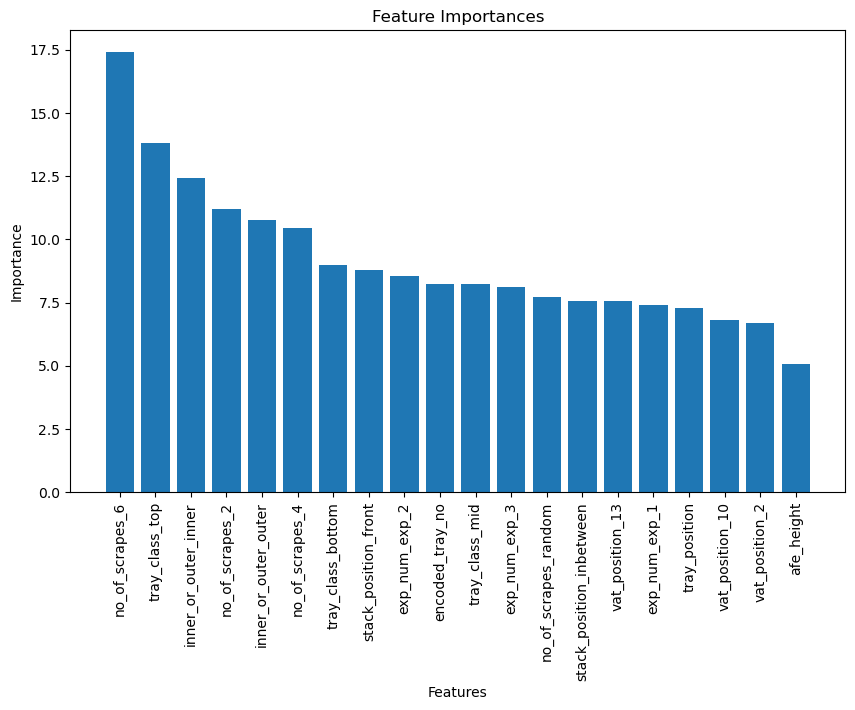

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define the MLP model
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print("RMSE: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r_squared))

# Get feature importances
importance = np.abs(model.coefs_[0]).sum(axis=1)
indices = np.argsort(importance)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importance = importance[indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, align='center')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

The neural network performed better than the baseline model, however it is outperformed by the tree-based models (RFR and XGBoost) which can be attributed to size of the dataset. Neural networks models work best with very large datasets (millions of records) as they are able to process very complex patterns without concerns for overfitting. However, in this case we are dealing with only about 1500 records of data which is quite a small sample space to derive the full value of Neural Networks.

#### Step 10: Hyperparameter Tuning for the best two models

As seen above, the two best models are Random Forest Regressor and XGBoost. Using hyperparameter tuning we shall aim to improve the 62% model fit.

##### a. Random Forest Regressor

RMSE: 6.1006
R-squared: 0.6211


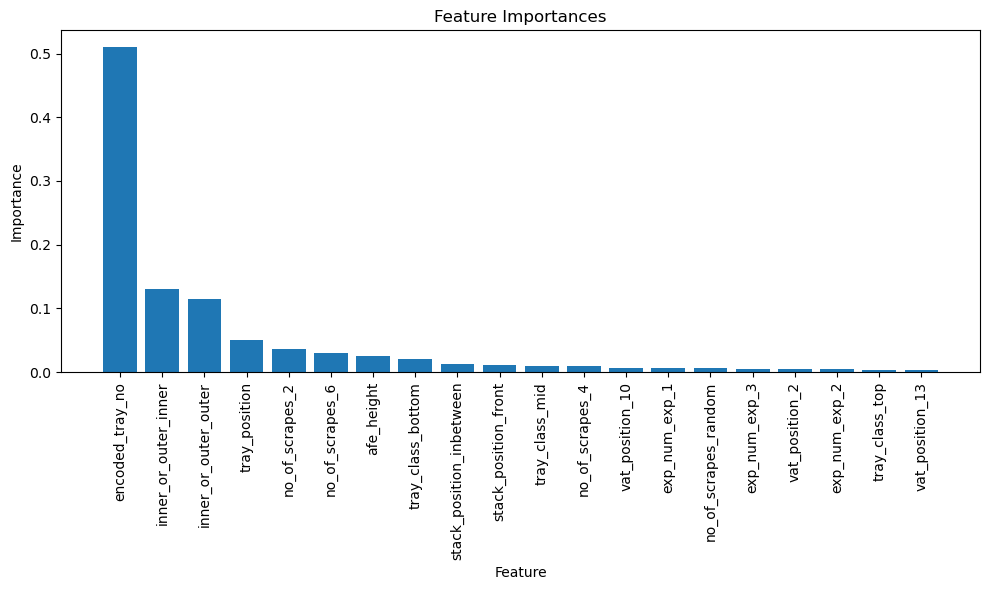

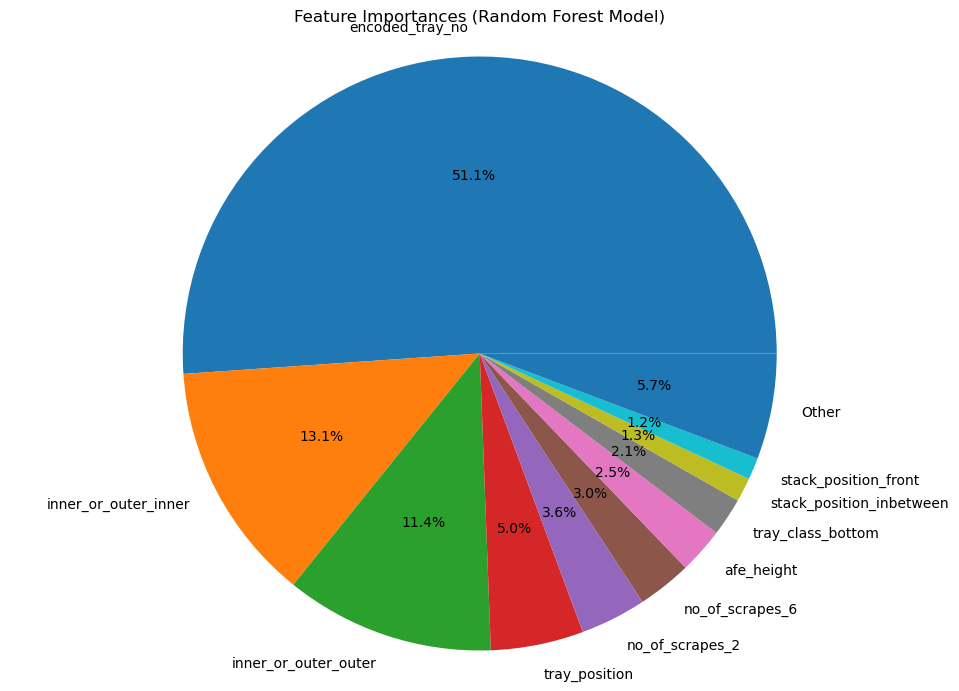

In [ ]:
# Import packages

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest regressor
model = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print("RMSE: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r_squared))

# Get feature importances from the best model
importance = best_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, align='center')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Calculate percentage importance
total_importance = np.sum(sorted_importance)
percentage_importance = sorted_importance / total_importance * 100

top_10_importance = percentage_importance[:10]
top_10_feature_names = sorted_feature_names[:10]

# Calculate percentage importance for other features
other_importance = 100 - np.sum(top_10_importance)

# Create labels for the pie chart
labels = list(top_10_feature_names)
labels.append('Other')

# Create a list of percentage importance values
values = list(top_10_importance)
values.append(other_importance)

# Create a pie chart of feature importances
plt.figure(figsize=(10, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Feature Importances (Random Forest Model)')
plt.axis('equal')
plt.tight_layout()
plt.show()

Hyperparameter tuning has not resulted in any real improvement in the model, meaning that the theory about needing more variables in the model may have some founding.

##### b. XGBoost

RMSE: 6.1097
R-squared: 0.6199


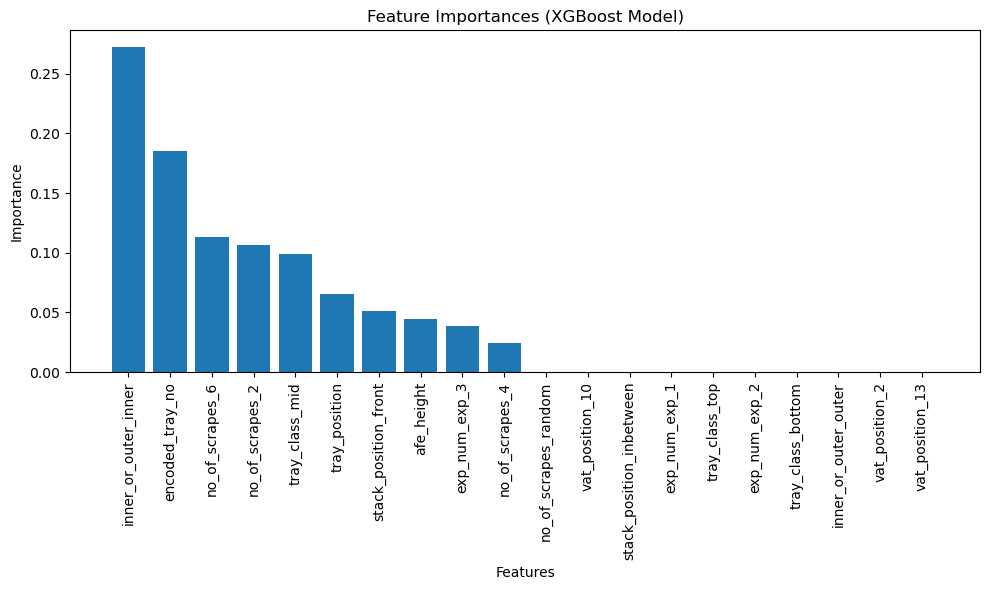

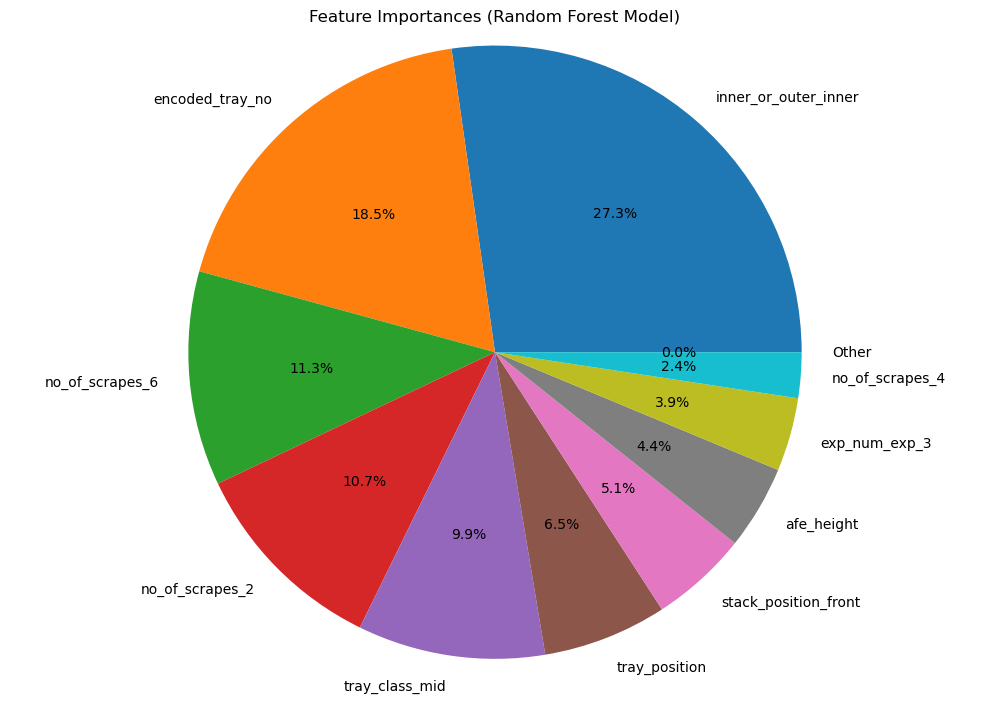

In [ ]:
# Import packages

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
model = xgb.XGBRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print("RMSE: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r_squared))

# Get feature importances from the best model
importance = best_model.feature_importances_
feature_names = X_test.columns

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

# Create a vertical bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names_sorted, importance_sorted)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (XGBoost Model)')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

# Calculate percentage importance
total_importance = np.sum(importance_sorted)
percentage_importance = importance_sorted / total_importance * 100

top_10_importance = percentage_importance[:10]
top_10_feature_names = feature_names_sorted[:10]

# Calculate percentage importance for other features
other_importance = 100 - np.sum(top_10_importance)

# Create labels for the pie chart
labels = list(top_10_feature_names)
labels.append('Other')

# Create a list of percentage importance values
values = list(top_10_importance)
values.append(other_importance)

# Create a pie chart of feature importances
plt.figure(figsize=(10, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Feature Importances (Random Forest Model)')
plt.axis('equal')
plt.tight_layout()
plt.show()

The XGBoost hyperparameter tuning has not resulted in any improvement either, but the feature importance was slightly reshuffled with inner / outer becoming more important at predicting variations in the cheese_weight_error. Based on these outcomes we shall be conducting further experiments to fully ascertain the effects of the most important variables from the two models.